# Improving Employee Retention By Predicting Employee Attrition Using Machine Learning

**Project Overview**:<br>
In this Mini Project, I have a role as a member of the Data Scientist team at a technology start-up company. The company is currently experiencing big problems; many employees have submitted their resignations, but the company has not yet decided on this matter. I will help the company to explain the current condition of its employees, as well as explore the problems within the company that cause employees to resign so that they can reduce the rate of employee resignations and outline a strategy that can increase employee retention. I will present descriptive findings from data using data visualization and data storytelling. I can get inferential findings using statistical analysis, or machine learning approaches with frameworks such as Interpretable & Explainable AI to convert model findings into a story.<br><br>

**Project Goals**:<br>
1. *Reduce Employee Resignation/Attrition Rate*.<br>This is the ultimate goal this project aims to achieve. By understanding the reasons behind employee resignations, the company can take stepsto make the workplace more attractive and retaint the employees.
2. *Improve employee retention*.<br>Retaining existing employee is generally cheaper and more efficient than hiring and training new ones. This project aims to identify strategies that will encourage employees to stay with the company.<br>

**Project Objective**:<br>
1. Understand the current state of employee sentiment.
2. Identify the root causes of employee resignations.
3. Develop data-driven recommendations to improve employee retention.
4. Communicate insights effectively.
5. Develop a predictive model to predict employee attrition.<br>

**Project Business Metrics**:<br>
1. Resignation Rate.
2. Time to fill open positions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [3]:
data_ori = pd.read_csv('../data/hr_data.csv')
pd.set_option('display.max_columns', None)

## Task 1 - Data Preprocessing
**Task Goals**:<br>
Preparing raw data into clean data and ready to be processed for analysis and machine learning modelling.<br><br>
**Task Objectives**:<br>
1. Checking whole data information.
2. Checking missing values.
3. Checking duplicate values.
4. Checking Statistical summary of categorical and numerical features.

Data Perprocessing<br>
- Missing values checking
- Duplicate values checking
- Drop unnecessary columns
- Fix invalid values    

In [4]:
display(data_ori.info())

display(data_ori.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

None

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24


Information obtained about the data:
- Data size is 287 rows and 25 columns
- There are missing values in the data
- There are numerical, categorical, and (supposed to be) datetime columns
- There are no target columns, will create one from `TanggalResign` column because the date when the employee resigns are the indicator of the employee have resigned.   

Checking and Handling Missing Values

In [5]:
null_val = data_ori.isnull().sum()
null_val = round(null_val[null_val > 0] / data_ori.shape[0] * 100, 2)
print(f'Proportion of missing values in the dataset:\n\n{null_val}')

Proportion of missing values in the dataset:

SkorKepuasanPegawai                    1.74
JumlahKeikutsertaanProjek              1.05
JumlahKeterlambatanSebulanTerakhir     0.35
JumlahKetidakhadiran                   2.09
IkutProgramLOP                        89.90
AlasanResign                          23.00
dtype: float64


Dive into missing values in `AlasanResign` column

In [6]:
resign_nan = data_ori[data_ori['AlasanResign'].isna()]
resign_nan[['AlasanResign', 'TanggalResign']]

,AlasanResign,TanggalResign
105,NaN,-
187,NaN,-
189,NaN,-
190,NaN,-
195,NaN,-
...,...,...
279,NaN,-
280,NaN,-
281,NaN,-
282,NaN,-


Findings:
- `IkutProgramLOP` has too many missing values (more than 85% from total data), I decided to drop this column because it has too many missing information.
- As we can see when the AlasanResign is missing, the `TanggalResign` value is '-', this means that the employee has not resigned yet. So, it will be more appropriate to fill the missing values in `AlasanResign` with 'masih_bekerja' value.
- Because most of the daata is Categorical, rest of the columns with missing values will be imputed with modus.

In [7]:
# Create a copy of the original data to avoid modifying the original data
# Copy data for EDAs
data_eda = data_ori.copy()

# Drop IkutProgramLOP columns
data_eda = data_eda.drop(columns='IkutProgramLOP')

# Fill missing values on AlasanResign with 'Unkown'
data_eda['AlasanResign'] = data_eda['AlasanResign'].fillna('masih_bekerja')

# Defube column that still coonatin missing values
missing = [
    'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 
    'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran'
]

# fill rest of the missing values with median
for col in missing:
    data_eda[col] = data_eda[col].fillna(data_eda[col].mode()[0])

# Check if there are any missing values left
null_val2 = data_eda.isnull().sum().sum()
print(f'Missing values left: {null_val2}')

Missing values left: 0


Checking Duplicate Values

In [8]:
total_dupl = data_eda.duplicated().sum()
print(f'Total number of duplicated rows in the data: {total_dupl}')

Total number of duplicated rows in the data: 0


In [9]:
# data_ori['EnterpriseID'] = data_ori['EnterpriseID'].astype('object')
categorical = data_eda.select_dtypes('object')

print('Statistical summary for Categorical data:')
display(categorical.describe())

Statistical summary for Categorical data:


,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,198,2,12,17,198


From statistical summary of the categorical data above we can see that:
- There's no column with only 1 unique value.
- There's 2 columns with pretty much unique values, `Pekerjaan` and `HiringPlatform`.(Other than identifier columns)
- There are 4 people with the same username, lets take colser look on the data again.

In [10]:
data_eda[data_eda.Username.duplicated()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.0,6.0,0.0,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.0,0.0,0.0,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [11]:
display(data_eda[data_eda.Username=='boredEggs0'])
display(data_eda[data_eda.Username=='brainyMagpie7'])

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,4.0,0.0,0.0,12.0,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.0,0.0,0.0,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.0,5.0,0.0,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.0,6.0,0.0,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-


They have different privacy data(different birth, telephone, email, etc). so I decided to keep all of them because they are not considered as a duplicate data.

In [12]:
numerical = data_eda.select_dtypes('number')
print('Statistical summary for Numerical data:\n')
display(numerical.describe())

Statistical summary for Numerical data:



,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,105923.324042,3.101045,3.888502,1.167247,0.411150,10.271777
std,4044.977599,0.836388,0.913060,2.285537,1.273018,6.935971
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,4.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000


All of the columns are considered as categorical data, which means if we see the data statistical summary we can't say that the data is normally distributed or skewed, because the data is categorical data.

## Feature Engineering

Checking values each columns to make sure the value is valid

In [13]:
for col in data_eda.columns:
    print(f'Value counts for {data_eda[col].value_counts()}\n')

Value counts for Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64

Value counts for EnterpriseID
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: count, Length: 287, dtype: int64

Value counts for StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64

Value counts for JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64

Value counts for StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64

Value counts for Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software 

In [14]:
invalid_reason = data_eda[data_eda.AlasanResign=='Product Design (UI & UX)']
invalid_reason['Pekerjaan']

27     Software Engineer (Front End)
124         Product Design (UI & UX)
147    Software Engineer (Front End)
203     Software Engineer (Back End)
Name: Pekerjaan, dtype: object

From the value counts of each columns there are some invalid values/values that need to be adjusted in the data:
- `StatusPernikahan` has '-' value, I will replace it with 'Unknown'.
- `PernahBekerja` has '1' value with 286 counts, but our data only has 287 rows, I will drop this column because it has no information.
- For `AlasanResign` with invalid values `Product Design (UI & UX)`, this value is a job title and because of that it will be replaced with 'Unknown' instead.

In [15]:
# Create function to feature engineer the data for feat eng the train and test data later
def feat_eng(data):
    """
    This function will feature engineer the data from cleaning the data(replacing values) to creating new columns

    Parameters:
    data: DataFrame, the data to be feature engineered

    Returns:
    data: DataFrame, the feature engineered data

    Example:
    >>> data_processed = feat_eng(data_ori)
    """
    # Replace '-' value in StatusPernikahan with 'Unknown'
    data['StatusPernikahan'] = data['StatusPernikahan'].replace('-', 'Unknown')

    # Replace 'Product Design (UI & UX)' in AlasanResign with 'Product Design'
    data['AlasanResign'] = data['AlasanResign'].replace('Product Design (UI & UX)', 'Unknown')

    # Create new 'Age' column from 'TanggalLahir'
    # Convert 'TanggalLahir to datetime format
    data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])

    # Define year now
    year_now = datetime.now().year

    # Calculate age from 'TanggalLahir'
    data['Age'] = year_now - data['TanggalLahir'].dt.year

    # Convert 'TanggalHiring' to datetime format
    data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])

    # Create new column 'HiringYear' from 'TanggalHiring'
    data['HiringYear'] = data['TanggalHiring'].dt.year

    # Calculate 'EmploymentTenure' from 'TanggalHiring'
    data['EmploymentTenure'] = year_now - data['HiringYear']

    # Create target column 'Resign' from 'TanggalResign'
    data['Resign'] = data['TanggalResign'].apply(lambda x: 'No' if x == '-' else 'Yes')

    # Replace '-' value in 'TanggalResign' with nan
    data['TanggalResign'] = data['TanggalResign'].replace('-', np.nan)

    # Convert 'TanggalResign' to datetime format
    data['TanggalResign'] = pd.to_datetime(data['TanggalResign'])

    # Create new column 'ResignYear' from 'TanggalResign'
    data['ResignYear'] = data['TanggalResign'].dt.year
    
    # data['ResignYear'] = data['ResignYear'].astype(int)

    return data

# Drop 'PernahBekerja' and other unnecessary columns(identifiers)
# data_proc1 = data_proc.drop(columns=['PernahBekerja', 'Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring'])

In [16]:
# Apply feature engineering function to the data
data_eda1 = feat_eng(data_eda)

# Display the data after feature engineering
display(data_eda1.head(3))

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Age,HiringYear,EmploymentTenure,Resign,ResignYear
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,52,2011,13,No,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,40,2014,10,Yes,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,50,2011,13,Yes,2014.0


## Task 2 - Annual Report on Employee Number Changes
**Task Goals**:<br>
Creating an annual report on the number of employees in the company.<br><br>
**Task Objectives**:<br>
1. Create 2 aggregated tables for the number of employees hired and resigned each year.
2. Join the 2 tables into 1 table.
3. Impute the missing values on the missing years.
4. Count total the employee who resigned and still working each year.
5. Make a visualization of the annual report.
6. Interpret the annual report.

In [17]:
# Create aggregated tables for number of employees hired and resigned each year
resign_agg = data_eda1.groupby('ResignYear')['EnterpriseID'].count().reset_index(name='TotalResign')
hire_agg =  data_eda1.groupby('HiringYear')['EnterpriseID'].count().reset_index(name='TotalHires')

# Kpom the 2 aggregated tables with outer join because there's missing year in the data
metrics_agg = pd.merge(resign_agg, hire_agg, left_on='ResignYear', right_on='HiringYear', how='outer')

# Impute missing values in the aggregated table
# Define columns to fill missing values
cols_fillna = {
    'ResignYear': 'HiringYear',
    'TotalResign': 0,
    'HiringYear': 'ResignYear',
    'TotalHires': 0
}

# Fill/Impute missing values
for col, fill_value in cols_fillna.items():
    if isinstance(fill_value, str):
        metrics_agg[col] = metrics_agg[col].fillna(metrics_agg[fill_value])
    else:
        metrics_agg[col] = metrics_agg[col].fillna(fill_value)

# Set only 1 year column for the year
# Rename Resign Year as the year
rename_yr = {'ResignYear': 'Year'}
metrics_agg = metrics_agg.rename(columns=rename_yr)
metrics_agg.drop(columns='HiringYear', inplace=True)

# Change the Year dtype to int for better view
metrics_agg['Year'] = metrics_agg['Year'].astype(int)

# Create a new column by Calculate the difference between TotalHiring and TotalResign for each year
metrics_agg['NetHires'] = metrics_agg['TotalHires'] - metrics_agg['TotalResign']

# Create new column by calculate the cumulative sum of TotalHiring over the years0
metrics_agg['CumulativeHiring'] = metrics_agg['NetHires'].cumsum()

# Create a new column by calculate the cumulative sum of TotalResign over the years
metrics_agg['CumulativeResign'] = metrics_agg['TotalResign'].cumsum()

# Create a new column by calculate the remaining employees for each year
# by subtracting the cumulative resignations from the cumulative hirings
metrics_agg['RemainEmp'] = metrics_agg['CumulativeHiring'] - metrics_agg['CumulativeResign']

metrics_agg

,Year,TotalResign,TotalHires,NetHires,CumulativeHiring,CumulativeResign,RemainEmp
0,2006,0.0,1.0,1.0,1.0,0.0,1.0
1,2007,0.0,2.0,2.0,3.0,0.0,3.0
2,2008,0.0,2.0,2.0,5.0,0.0,5.0
3,2009,0.0,7.0,7.0,12.0,0.0,12.0
4,2010,0.0,8.0,8.0,20.0,0.0,20.0
5,2011,0.0,76.0,76.0,96.0,0.0,96.0
6,2012,0.0,41.0,41.0,137.0,0.0,137.0
7,2013,5.0,43.0,38.0,175.0,5.0,170.0
8,2014,12.0,56.0,44.0,219.0,17.0,202.0
9,2015,8.0,31.0,23.0,242.0,25.0,217.0


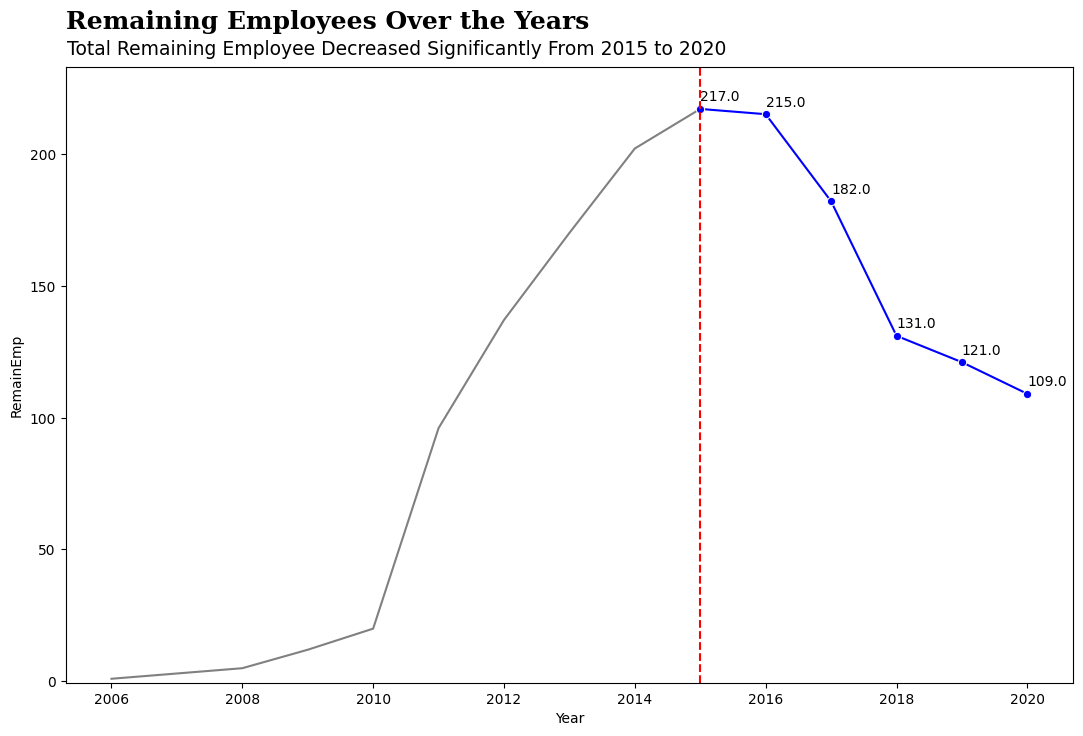

In [18]:
yearsh = list(range(2015, 2021))
dat2015 = metrics_agg[metrics_agg.Year.isin(yearsh)]

yearsnh = list(range(2006, 2016))
dat2006 = metrics_agg[metrics_agg.Year.isin(yearsnh)]

plt.figure(figsize=(13, 8))
sns.lineplot(
    x='Year',
    y='RemainEmp',
    data=dat2006,
    # marker='o',
    color='grey'
)

line = sns.lineplot(
    x='Year',
    y='RemainEmp',
    data=dat2015,
    marker='o',
    color='b'
)

for x, y in zip(dat2015['Year'], dat2015['RemainEmp']):
    plt.text(x=x, y=y+3, s=f'{y}', color='black')


fdbold = {
    'family': 'serif',
    'color': 'black',
    'weight': 'bold',
    'size': 18
}

plt.title(
    'Remaining Employees Over the Years',
    fontdict=fdbold, 
    loc='Left',
    pad=27.5
)

plt.text(
    2005.32,
    237.5,
    'Total Remaining Employee Decreased Significantly From 2015 to 2020',
    fontsize=13.5,
    color='black'
)

# plt.text(2013.3, 235, 'From 2015 to 2020', fontsize=13.5, color='black')
plt.axvline(2015, color='r', linestyle='--', linewidth=1.5)
plt.ylim(-0.5, 233)

plt.show()

Insights:<br>
- The number of employees increase significantly from 2010 to 2015, but then decrease significantly from 2016 to 2020.

- From 2016 to 2020, The **company has lost 108 employees** in total, with the highest number of employees lost in 2018.

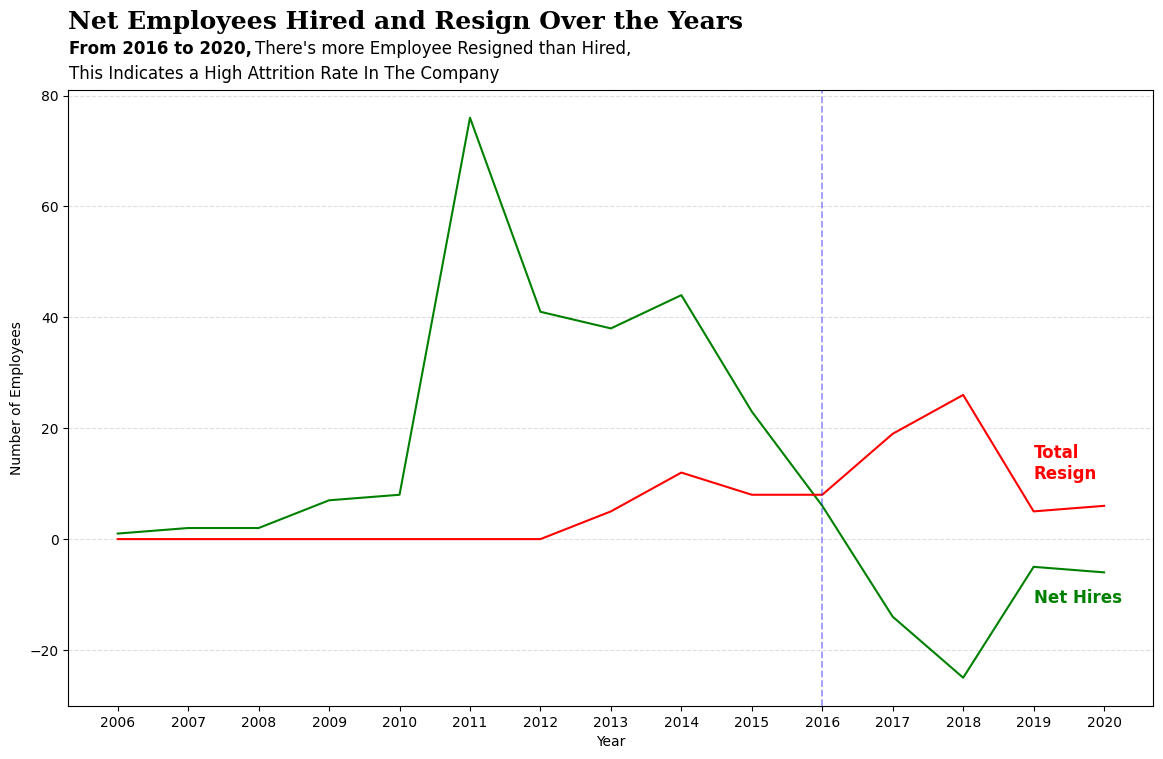

In [19]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    x='Year', 
    y='NetHires',
    data=metrics_agg,
    # marker='o',
    color='g'
)
sns.lineplot(
    x='Year', 
    y='TotalResign', 
    data=metrics_agg,
    # marker='o', 
    color='r'
)

# for i in range(len(metrics_agg)):
#     if metrics_agg['Year'].iloc[i] >= 2017:
#         plt.annotate(
#             metrics_agg['NetHires'].iloc[i],
#             (metrics_agg['Year'].iloc[i], metrics_agg['NetHires'].iloc[i]),
#             textcoords='offset points',
#             xytext=(0, 5),
#             ha='left'
#         )
#         plt.annotate(
#             metrics_agg['TotalResign'].iloc[i],
#             (metrics_agg['Year'].iloc[i], metrics_agg['TotalResign'].iloc[i]),
#             textcoords='offset points',
#             xytext=(0, 1),
#             ha='right'
#         )

plt.xticks(metrics_agg['Year'])
# plt.yticks(np.arange(-20, 80, 10))
plt.ylabel('Number of Employees')
fdbold = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}
plt.title('Net Employees Hired and Resign Over the Years', fontdict=fdbold, pad=44, loc='left')
plt.text(2005.31, 87.5, "From 2016 to 2020,", fontsize=12, weight='bold', color='black')
plt.text(2007.95, 87.5, "There's more Employee Resigned than Hired,", fontsize=12, color='black')
plt.text(2005.31, 83, "This Indicates a High Attrition Rate In The Company", fontsize=12, color='black')

plt.text(2019, -11.4, 'Net Hires', color='g', fontsize=12, weight='bold')
plt.text(2019, 11, 'Total\nResign', color='r', fontsize=12, weight='bold')
plt.axvline(2016, color='b', linewidth=1.3, alpha=0.4, linestyle='--')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

**Insight**:<br>
As have said before, the company employee number is increasing every year(total resign still under net hires) from 2006 to 2015, untill 2016 to 2020 the total resign is more than the total hires. This indicates that the company has a problem with employee retention(High Attrition Rate).

Text(0.5, 1.0, 'Percentage of Employee Resign from 2006 to 2020')

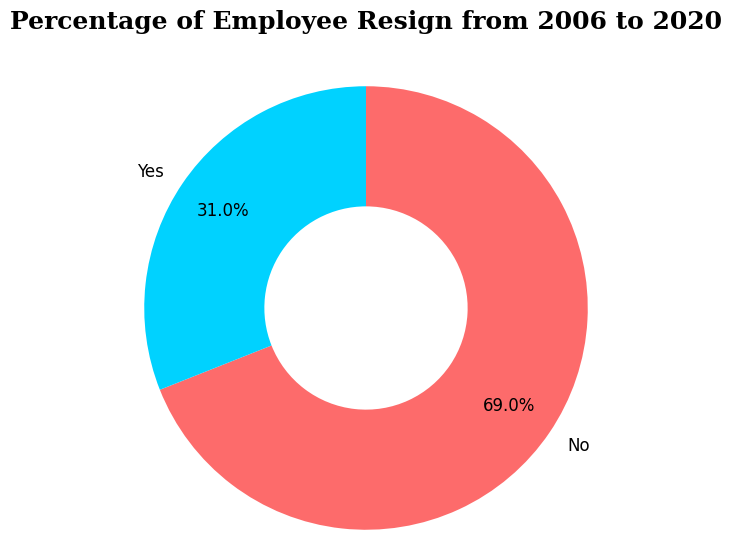

In [20]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Get the value counts of total employee resign from 'Resign' column
resign_count = data_eda1['Resign'].value_counts()

# Get the index of the value counts 
resign_index = resign_count.index


# Create a pie chart for the total employee resign to see the percentage of employee resign
wedges, texts, autotexts = plt.pie(
    resign_count,
    labels=resign_index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FD6B6B', '#00D2FF'],
    textprops={'fontsize': 12},
    wedgeprops=dict(width=0.65),
    pctdistance=0.78,
    radius=1.2,
    counterclock=False
)

plt.title('Percentage of Employee Resign from 2006 to 2020', fontdict=fdbold, pad=35)

**Insight**:<br>
The total Attrition Rate from 2006 to 2020 is 31.0%, while the retention rate is 69.0%,
This is a high attrition rate, which means the company has a problem as I said before.
Because of this the company needs to take action to reduce the attrition rate and increase the retention rate, That's why I will create a predictive model to predict employee attrition.

## Task 3 -  Resign Reason Analysis For Employee Attrition Management Strategy
**Task Goals**:<br>
 Visualize data, Give insight to stakeholder, so the stakeholder understand what is the main problem that cause the employee resign, and can take strategy action to reduce employee resignations.<br><br>

**Task Objectives**:<br>
1. Create aggregated tables resign or not resign by their job title.
2. Join 2 aggregated tables (Resign and Not Resign) into 1 table.
3. Create 2 new columns from the joined table total employee, and percentage of remaining employees.
4. Create a plot to visualize the percentage of remaining employees by job title.
5. Create aggregated tables to count total resign employee by career level, employee performance, and resign reason.
6. Create a plot to visualize the aggregated table.
7. Write an interpretation and recommendation for the plot.


In [21]:
job_byres = data_eda1.groupby('Pekerjaan')['Resign'].value_counts().reset_index(name='TotalResign')

resign = job_byres[job_byres['Resign']=='Yes'].drop(columns='Resign')
not_resign = job_byres[job_byres['Resign']=='No'].drop(columns='Resign')

not_resign = not_resign.rename(columns={'TotalResign': 'TotalRemaining'})

joinedres = pd.merge(resign, not_resign, on='Pekerjaan', how='outer')

joinedres.fillna(0, inplace=True)

joinedres['TotalResign'] = joinedres['TotalResign'].astype(int)

joinedres['TotalEmployee'] = joinedres['TotalRemaining'] - joinedres['TotalResign']

joinedres['PercentageRemaining'] = round((joinedres['TotalEmployee'] / joinedres['TotalRemaining']) * 100, 2)

joinedres['PercentageResign'] = round((joinedres['TotalResign'] / joinedres['TotalRemaining']) * 100, 2)

joinedres['FullPct'] = 100

joinedres = joinedres.sort_values(by='PercentageResign')

joinedres

,Pekerjaan,TotalResign,TotalRemaining,TotalEmployee,PercentageRemaining,PercentageResign,FullPct
2,DevOps Engineer,0,3,3,100.00,0.00,100
3,Digital Product Manager,0,2,2,100.00,0.00,100
4,Machine Learning Engineer,0,2,2,100.00,0.00,100
6,Product Design (UX Researcher),0,1,1,100.00,0.00,100
8,Scrum Master,0,3,3,100.00,0.00,100
9,Software Architect,0,1,1,100.00,0.00,100
13,Software Engineer (iOS),0,3,3,100.00,0.00,100
11,Software Engineer (Back End),28,81,53,65.43,34.57,100
10,Software Engineer (Android),7,17,10,58.82,41.18,100
1,Data Engineer,3,7,4,57.14,42.86,100


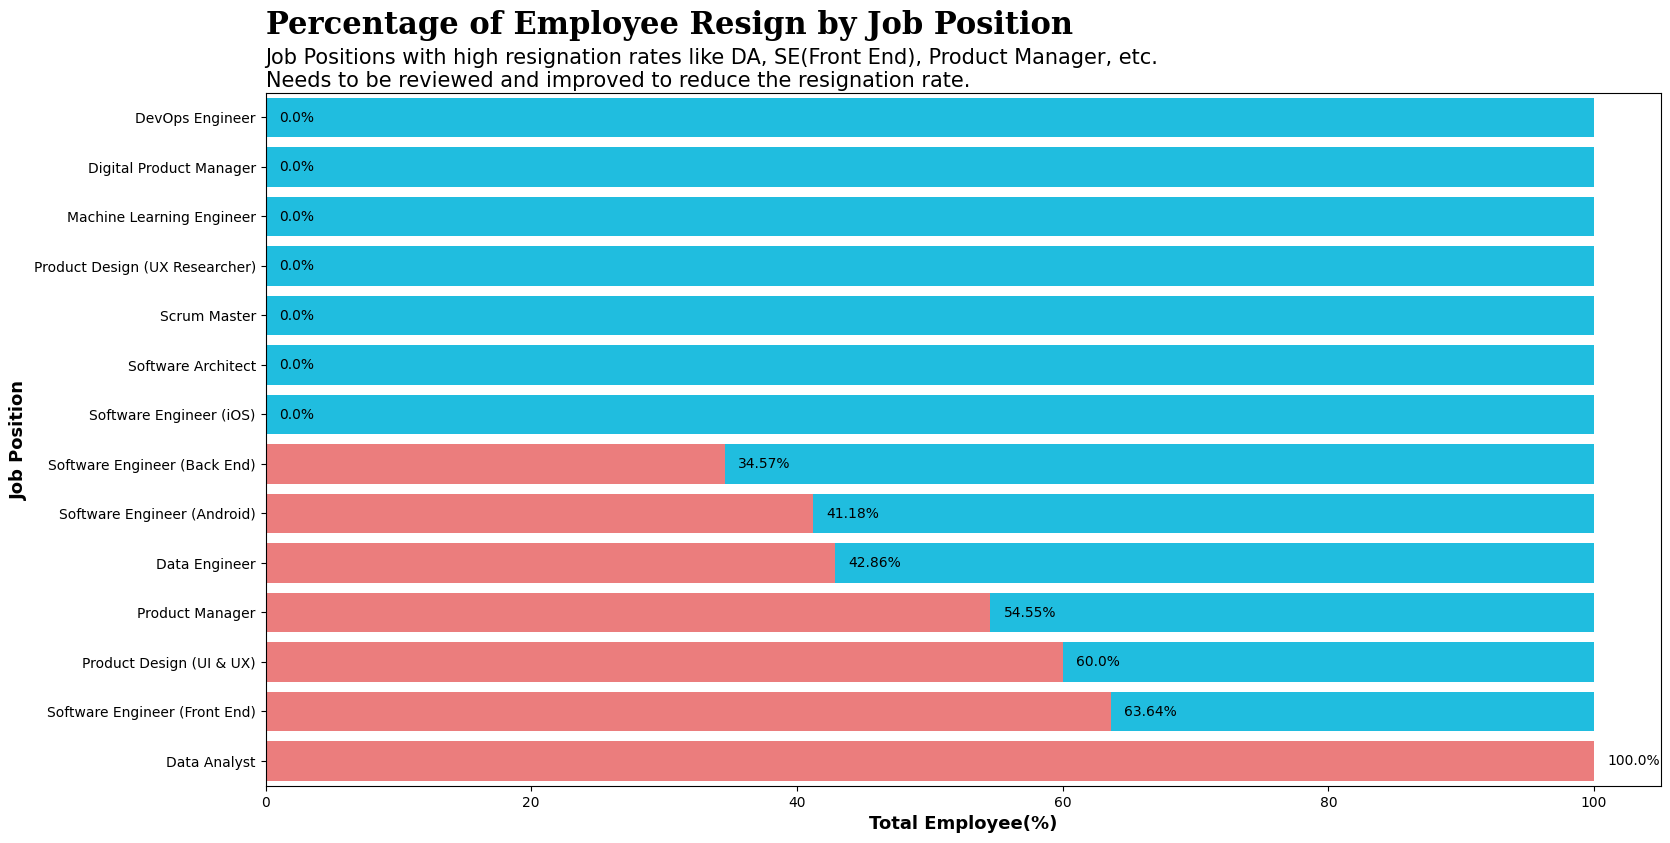

In [22]:
plt.figure(figsize=(18, 9))

sns.barplot(
    x='FullPct',
    y='Pekerjaan',
    data=joinedres,
    color='#00D2FF'
)

bares = sns.barplot(
    x='PercentageResign',
    y='Pekerjaan',
    data=joinedres,
    color='#FD6B6B'
)

# add annotation for percentage resign
for i in range(len(joinedres)):
    bares.text(
        joinedres['PercentageResign'].iloc[i] + 1,
        i,
        f'{joinedres["PercentageResign"].iloc[i]}%',
        color='black',
        ha='left',
        va='center'
    )

# Update defined fondict before 
fdbold['size'] = 22

# Add title for the plot
plt.title(
    'Percentage of Employee Resign by Job Position',
    fontdict=fdbold,
    pad=42.5,
    loc='left'
)

plt.text(
    0,
    -0.62,
    'Job Positions with high resignation rates like DA, SE(Front End), Product Manager, etc.\nNeeds to be reviewed and improved to reduce the resignation rate.', 
    fontsize=15,
    # fontweight='bold',
    color='black'
)

plt.xlabel('Total Employee(%)', fontsize=13, fontweight='bold')
plt.ylabel('Job Position', fontsize=13, fontweight='bold')

plt.show()

**Insight**:
Job Position with high resignation rate like DA, SE(Front End), Product Manager, etc.\n Needs to be reviewd and improved to reduce the resignation rate.

<!-- **Recommendation**:
1. Conduct Exit Interviews<br>Exit interviews provide valuable insights into compensation, workload, career development opportunities, and company culture – all potential factors influencing resignation. -->



In [43]:


jobres = data_eda1.groupby(['Pekerjaan', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

jobres = jobres[jobres['Resign']=='Yes']

# Create a dictionary to map unique values to integers for source and target
unique_jobs = jobres['Pekerjaan'].unique()
unique_reasons = jobres['AlasanResign'].unique()
label_list = list(unique_jobs) + list(unique_reasons)
label_dict = {label: index for index, label in enumerate(label_list)}

# Create source, target and values lists
source = jobres['Pekerjaan'].map(label_dict).values
target = jobres['AlasanResign'].map(label_dict).values
value = jobres['Total'].values

# Create the sankey chart
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=25,
        line=dict(color='black', width=0.5),
        label=label_list,
        # color='red'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        # color='blue',
        # hoverinfo='value',
        line=dict(width=0.5, color='white')
    )
)])

fig.update_layout(
    title_text='Reasons for Employee Resign by Job Position',
    title_font=dict(
        family='serif',
        size=22,
        color='black'
    ),
    font_size=13.5,
    width=800,
    height=800 
)

fig.show()

In [ ]:
jobres = data_eda1.groupby(['Pekerjaan', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

jobres = jobres[jobres['Resign']=='Yes']

fig = px.sunburst(
    jobres,
    path=['Pekerjaan', 'AlasanResign'],
    values='Total'
)

fig.update_layout(
    width=800,
    height=800
)

fig.show()

# grp_reason = jobres.groupby('AlasanResign')['Total'].sum().reset_index(name='CountReason')
# grp_reason = grp_reason.sort_values(by='CountReason', ascending=False)
# clrpal = list(sns.color_palette('hls', 5))

# plt.figure(figsize=(12, 4))
# sns.barplot(
#     x='AlasanResign',
#     y='CountReason',
#     data=grp_reason,
#     palette = clrpal + ['#D3D6DE'] * 5,
#     legend=False
# )
# plt.xticks(rotation=30)

# plt.show()

- Data Analyst with the highest resignation rate (100%) from the previous plot, the resignation reason is mostly because of the toxic culture and internal conflict in the company.
- 

# INTERPRETATE VISUALIZATION ABOVE

From all job positions resignation reasons, the most common reasons (top count) that need to be highlighted are:
- Jam kerja (work hours), 18% of the total employees resigned reason is because of work hours, This could indicate that employees are feeling overworked or unsatisfied with the work-life balance offered by the company. management need to consider redistributing tasks, hiring additional support, or offering flexible work arrangements to improve work-life balance.

- Ganti karir (switch career), 
- Kejelasan career (career clarity)
- Tidak bisa remote (can't work remotely)
- Toxic Culture,  75% Data Analyst resigned because of this

**Spesific Reasons by department**:
- Software Engineer (Back End): Lack of career clarity (kejelasan_karir), appreciation (apresiasi), and leadership.
- Data Analyst: Internal conflict and toxic culture.
- Software Engineer (Android): Lack of career clarity (kejalankan_karir) and toxic culture.
- Product Manager: Workload (jam_kerja) and lack of career clarity (kejelasan_karir).
- Product Design (UI & UX): Desire for career change (ganti_karir) and unhappiness (tidak_bahagia).
- Software Engineer (Front End): Remote work policy (tidak_bisa_remote) and leadership.

In [ ]:
jpa = data_eda1.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

jpa_res = jpa[jpa['Resign']=='Yes']

fig = px.sunburst(
    jpa_res, 
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
    values='Total'
)

fig.update_layout(
    width=800,
    height=800,
    title='Employee Resignation by Career level, Performance, and Reason',
    title_font_size=20,
    title_font_family='serif',
    title_font_color='black',
    title_x=0.5,
    title_y=1,
    title_pad_t=20,
    title_pad_b=20
)

fig.show()



**Insight**:
- The lower the career level the higher the resignation rate.
- The lowest careel level (Freshgraduate Program) has the highest resignation rate, with the most common resignation reason is 'Ganti Karir'(Switch Career) and 'Kejelasan Karir'(Career Clarity).
- Employees that resigned on every carrer level has the good performance level like 'Sangat Bagus'(Very Good), 'Bagus'(Good), and 'Biasa'(Normal), this means the company loses good talents.
- The top 5 most common resignation reason for every career level is:
   - jam kerja (work hours)
   - ganti karir (switch career) / kejelasan karir (career clarity)
   - tidak bisa remote (can't work remotely)
   - toxic culture
   - leadership

<!-- **Insights Breakdown**:
- The career level with the highest resignation is Fresh Graduate program with more than 50% of the employees resigning.<br>
        - The company needs to evaluate the Fresh Graduate program to find out the reasons why the employees resign. The company can improve the program to make it more attractive to employees. -->